In [1]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

Загрузка dataset.

In [36]:
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data['DESCR'])
print(iris_data['target_names'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Загрузка данных в pandas

In [35]:
feature_names = iris_data['feature_names']
df = pd.DataFrame(iris_data['data'], columns=feature_names)
species_names = iris_data['target_names']
target_idxs = iris_data['target']
df['species'] = species_names[target_idxs]

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [8]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Распределение переменной относительно конкретного класса

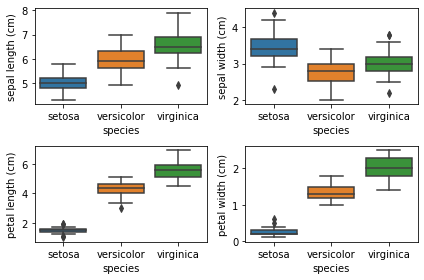

In [9]:
fig, axs = plt.subplots(2, 2)

for i, feat_name in enumerate(feature_names):
    row = i//2
    col = i%2
    sns.boxplot(x = 'species', y = feat_name, data = df, order = species_names, ax = axs[row, col]);
    
fig.tight_layout();

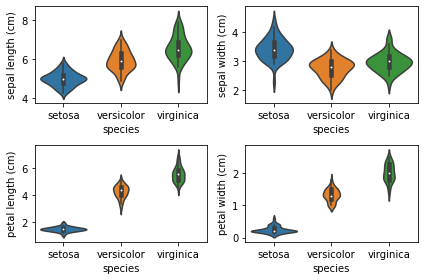

In [10]:
fig, axs = plt.subplots(2, 2)

for i, feat_name in enumerate(feature_names):
    row = i//2
    col = i%2
    sns.violinplot(x = 'species', y = feat_name, data = df, order = species_names, ax = axs[row, col]);
    
fig.tight_layout();


Попарное отображение признаков с помощью функции seaborn.pairplot().

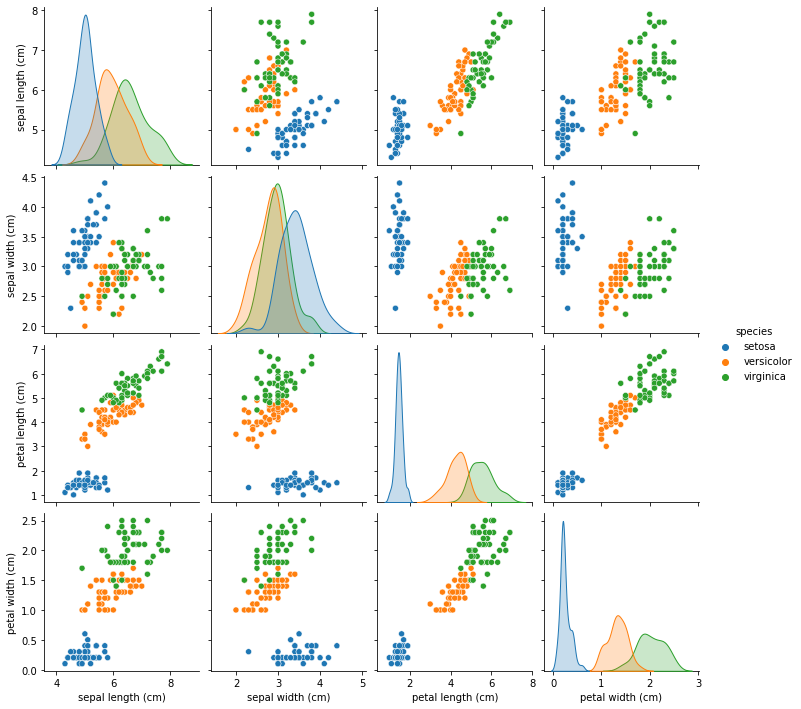

In [11]:
sns.pairplot(df, hue='species')

# Разработка модели


Формирование выборок

In [12]:
from sklearn.model_selection import train_test_split

TRAIN_RATIO = 0.7

X = df[feature_names]
y = target_idxs

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(105, 4) (105,)
(45, 4) (45,)


Создание объекта модели

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Результаты работы

In [14]:
sample = X_test.iloc[0]

prediction = logreg.predict([sample])
predict_proba = logreg.predict_proba([sample])
predict_log_proba = logreg.predict_log_proba([sample])

print(f'  Sample:\n{sample}')
print(f'  Prediction proba:\n{predict_proba[0]}')
print(f'  Prediction proba sum:\n{sum(predict_proba[0])}')
print(f'  Prediction log proba:\n{predict_log_proba[0]}')
print(f'  Prediction:\n{prediction}')
print(f'  Prediction name:\n{species_names[prediction]}')

  Sample:
sepal length (cm)    7.3
sepal width (cm)     2.9
petal length (cm)    6.3
petal width (cm)     1.8
Name: 107, dtype: float64
  Prediction proba:
[1.99456039e-06 3.30315377e-02 9.66966468e-01]
  Prediction proba sum:
1.0
  Prediction log proba:
[-13.12508689  -3.41029249  -0.03359146]
  Prediction:
[2]
  Prediction name:
['virginica']


Значения весов и смещения

In [15]:
print(f'  Classes: {logreg.classes_}')
print(f'  Weights:\n{logreg.coef_}')
print(f'  Bias:\n{logreg.intercept_}')

  Classes: [0 1 2]
  Weights:
[[-0.53386701  0.76928293 -2.22497221 -0.97108869]
 [ 0.41969751 -0.43035179 -0.09734326 -0.84011279]
 [ 0.11416951 -0.33893114  2.32231548  1.81120148]]
  Bias:
[  9.82949668   2.42239176 -12.25188844]


Матрица замешательств

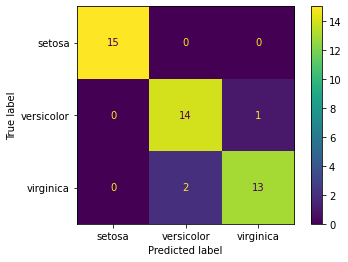

In [16]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names)

Числовые показатели

In [17]:
from sklearn.metrics import classification_report

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Выводы

Модель показала хорошие результаты классификации, точность составила 93%.

# ROC-кривая

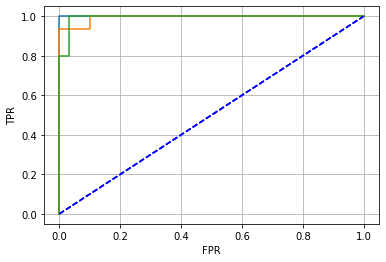

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
diag_values = np.array([
        [0, 0],
        [1, 1],
    ])
y_pred_proba = logreg.predict_proba(X_test)
for i in range (X_test.shape[1]-1):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,i],pos_label=i)
    plt.plot(fpr, tpr)
    plt.plot(diag_values[:,0], diag_values[:,1], 'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)

#Использование StandartScaler

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg.fit(X_train_scaled , y_train)
y_pred = logreg.predict(X_test_scaled )
rep = classification_report(
    y_test, y_pred, 
    target_names=species_names
)
print(rep)
scores = cross_val_score(logreg,scaler.transform(X),y,cv=5,scoring='f1_macro')
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.87        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Scores: [0.96658312 0.96658312 0.93265993 0.89974937 1.        ]
F1 (macro):  0.95 (+/-  0.07)


Немного уменьшилась точность.

#Модель LogisticRegression

Количесвто итераций-100, по умолчанию

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=100,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


250 итераций

In [41]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
     max_iter=250,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Показатели не изменились

27 итераций

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=27,
    multi_class='multinomial'
)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
report = classification_report(
    y_test, y_pred, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Результаты улучшились

Получается, что при увеличении количества итераций больше 100, улучшений не происходит, а при значении 27-показатели стали лучше чем при 100.

#Обучение на двух признаках

sepal length (cm) + sepal width (cm);

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

TRAIN_RATIO = 0.7
X_new= df[[feature_names[0],feature_names[1]]]
y_new= target_idxs

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_new
)
logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train_new, y_train_new)
y_pred_new = logreg.predict(X_test_new)
report = classification_report(
    y_test_new, y_pred_new, 
    target_names=species_names
)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.60      0.60      0.60        15
   virginica       0.60      0.60      0.60        15

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.73      0.73      0.73        45



petal length (cm) + petal width (cm);

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

TRAIN_RATIO = 0.7
X_new= df[[feature_names[2],feature_names[3]]]
y_new= target_idxs

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, 
    train_size=TRAIN_RATIO, 
    random_state=RANDOM_STATE,
    stratify=y_new
)


logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=200,
    multi_class='multinomial'
)
logreg.fit(X_train_new, y_train_new)


y_pred_new = logreg.predict(X_test_new)
report = classification_report(
    y_test_new, y_pred_new, 
    target_names=species_names
)

print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



Большая точность получается при использовании обучения по признакам petal length (cm) + petal width (cm)

#Найти лучшую пару признаков методом кросс-валидации

In [45]:
from sklearn.model_selection import cross_val_score
X = df[feature_names]
y = target_idxs
for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        if (i<=j):
            continue
        X_new=X[[feature_names[i], feature_names[j]]]
        scores = cross_val_score(
            logreg,     # Модель для оценки
            X_new,          # Данные для обучения
            y,          # Разметка для обучения
            cv=5,       # Количество фолдов
            scoring='f1_macro'  # Желаемая метрика
        )
        print(feature_names[i], feature_names[j])
        print(f'Scores: {scores}')
        print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

sepal width (cm) sepal length (cm)
Scores: [0.72222222 0.82949702 0.76608187 0.86666667 0.86807706]
F1 (macro):  0.81 (+/-  0.12)
petal length (cm) sepal length (cm)
Scores: [0.93333333 1.         0.89974937 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.08)
petal length (cm) sepal width (cm)
Scores: [0.93333333 1.         0.89974937 0.93333333 1.        ]
F1 (macro):  0.95 (+/-  0.08)
petal width (cm) sepal length (cm)
Scores: [0.93333333 0.96658312 0.93265993 0.93265993 1.        ]
F1 (macro):  0.95 (+/-  0.05)
petal width (cm) sepal width (cm)
Scores: [0.93333333 0.96658312 0.89974937 0.93265993 0.96658312]
F1 (macro):  0.94 (+/-  0.05)
petal width (cm) petal length (cm)
Scores: [0.96658312 0.96658312 0.93265993 0.93333333 1.        ]
F1 (macro):  0.96 (+/-  0.05)


Лучшая пара - petal width (cm) petal length (cm)

#Классификация К ближайших соседей (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
scores = cross_val_score(
        knn,     # Модель для оценки
        X,          # Данные для обучения
        y,          # Разметка для обучения
        cv=5,       # Количество фолдов
        scoring='f1_macro'  # Желаемая метрика
    )
print(f'Scores: {scores}')
print(f'F1 (macro): {scores.mean(): 0.2f} (+/- {scores.std() * 2: 0.2f})')

Scores: [0.93333333 1.         1.         0.96658312 1.        ]
F1 (macro):  0.98 (+/-  0.05)


Изменение числа соседей. График отображает зависимость точности от числа соседей.

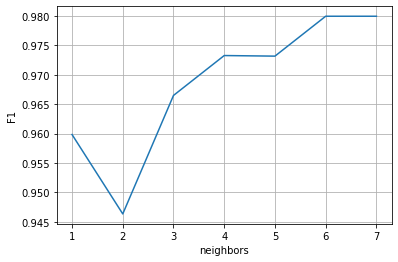

[[[1, 0.9598319029897976]], [[2, 0.946330472646262]], [[3, 0.9664818612187034]], [[4, 0.9732664995822891]], [[5, 0.973165236323131]], [[6, 0.9799498746867169]], [[7, 0.9799498746867169]]]


In [51]:
from sklearn.neighbors import KNeighborsClassifier
a1=[]
a2=[]
for k in range(1,8):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,     # Модель для оценки
        X,          # Данные для обучения
        y,          # Разметка для обучения
        cv=5,       # Количество фолдов
        scoring='f1_macro'  # Желаемая метрика
    )
    a1.append(scores.mean())
    a2.append([k,scores.mean()])

plt.plot(range(1,8),a1)
plt.grid(True)
plt.ylabel('F1')
plt.xlabel('neighbors')
plt.show()
print(a2)

KNN метод основан на том, что объект можно отнести к тому классу, к которому принадлежит большинство его k соседей. Этот метод лучше, чем метод логистической регрессии.

#Плоскость решений при использовании двух признаков модели логистической регрессии и модели KNN

Логистическая

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


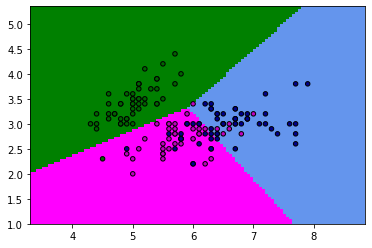

In [56]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['green', 'magenta', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkgreen', 'm', 'darkblue'])
X_scaled=iris_data.data[:, 0:2]

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=27,
    multi_class='multinomial'
)
logreg.fit(X_scaled,y)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

KNN

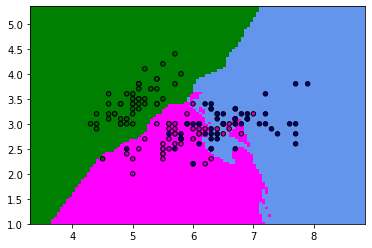

In [53]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_scaled,y)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

#Вопроси

* Почему массив весов имеет размер 3х4, а массив смещений - 3 элемента в модели логистической регрессии?

Число смещений равно числу записей 

* В чем различия методов усреднения статистики `macro`, `micro` и `weighted`?

macro - арифметическое среднее значение метрики для каждого класса без учета пропорции для каждой метрики

micro - использует количество истинных положительных, ложных отрицательных значений и ложных срабатываний

weighted -  среднее значение с учетом доли для каждой метрики в наборе данных.

* Что означает `support` в отчете классификации?

Количество вхождений класса в указанный набор данных. 

* Продемонстрируйте расчет показателей `recall` и `precision` одного из классов по любой из CM.

class3: recall=1.0; precision=1.0
class3: recall=0.9333333333333333; precision=0.9333333333333333
class3: recall=0.9333333333333333; precision=0.9333333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


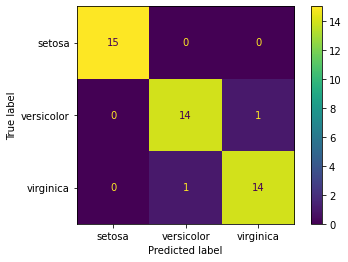

In [59]:
from sklearn.metrics import plot_confusion_matrix

logreg = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=27,
    multi_class='multinomial'
)
logreg.fit(X_train,y_train)
disp = plot_confusion_matrix(
    logreg, X_test, y_test,
    display_labels=species_names)
for class_index in range(3):
    precision=(disp.confusion_matrix[class_index,class_index]/np.sum(disp.confusion_matrix[:,class_index]))
    recall=(disp.confusion_matrix[class_index,class_index]/np.sum(disp.confusion_matrix[class_index,:]))
    print(f'class{i}: recall={recall}; precision={precision}')

* Что происходит при использовании аргумента `stratify` при разделении на выборки? Что будет, если не использовать данный аргумент? 

Задаёт пропорции разделения, иначе произвольно.

* В чем разницах подходов обучения модели линейной регрессии и логистичесой регрессии?

Разница есть в функции потерь. Задача линейной регрессии предсказать численное значение с некоторой точностью, а логистической-разделить данные на указанные классы. При этом, очень важно выбрать признаки для обучения.

* На основе чего работает метод KNN?

На основе предсказания класса по классам ближайших объектов.

* Как влияет количество соседей на работу модели? 

Мало соседей-плохо, много-тоже, поскольку границы классов становятся нечеткими.

* В чем отличие кросс-валидации от разделения на выборки обучения/валидации/теста? Для чего применяется выборка обучения? Валидации? А теста?

Разделение на выборки дает два набора данных и по ним мы может получить оценки только два раза. При кросс-валидации можно получить К оценок даже если данных мало.

На выборке обучения модель учится.
На выборке валидации оценивается её работоспособность на новых данных.
На тестововй выборкен получают оценки работы.
